In [34]:
import pandas as pd
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import matplotlib.pyplot as plt

In [25]:
df = pd.read_csv("../data/Dry_Bean_Dataset.csv")
df.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


In [26]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]
y.unique()

array(['SEKER', 'BARBUNYA', 'BOMBAY', 'CALI', 'HOROZ', 'SIRA', 'DERMASON'],
      dtype=object)

In [32]:
X.shape

(13611, 16)

pca

In [27]:
pca = PCA(n_components=2)
scaler = StandardScaler()
# X = scaler.fit_transform(X)
X_pca = pca.fit_transform(X)
X_pca

array([[-3.51499237e+04, -2.20868414e+01],
       [-3.45863219e+04,  5.85865649e+01],
       [-3.37640263e+04, -3.89953729e+01],
       ...,
       [-1.56345152e+04, -8.72390530e+01],
       [-1.55590550e+04, -2.40310051e+01],
       [-1.55983141e+04, -7.82400447e+01]])

plot

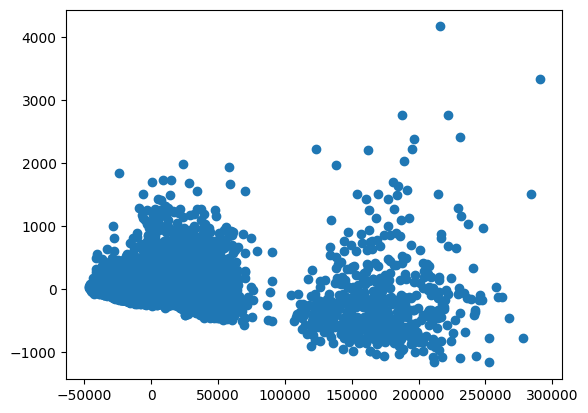

In [28]:
plt.scatter(X_pca[:,0], X_pca[:,1])

In [31]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=192, random_state=192)

In [55]:
def metric_display(Y_true, Y_pred):
    acc = metrics.accuracy_score(Y_true, Y_pred)
    recall = metrics.recall_score(Y_true, Y_pred, labels=y.unique(), average=None)
    precision = metrics.precision_score(Y_true, Y_pred, labels=y.unique(), average=None)

    return {
        "Accuracy":acc,
        "Recall":recall,
        "Precision":precision
    }

## Naive Bayes

In [35]:
bayes_model = GaussianNB()
bayes_model.fit(X_train, Y_train)

GaussianNB()

In [38]:
bayes_predicts = bayes_model.predict(X_test)

In [56]:
metric_display(Y_test, bayes_predicts)

{'Accuracy': 0.6979166666666666,
 'Recall': array([0.72972973, 0.40909091, 1.        , 0.72      , 0.73076923,
        0.63636364, 0.79545455]),
 'Precision': array([0.69230769, 0.52941176, 0.83333333, 0.66666667, 0.76      ,
        0.6       , 0.81395349])}

## Logistic Multinomial

In [45]:
logistic_model = LogisticRegression(multi_class="multinomial", max_iter=10000)
logistic_model.fit(X, y)

LogisticRegression(max_iter=10000, multi_class='multinomial')

In [47]:
logistic_preds = logistic_model.predict(X_test)
# logistic_preds

In [57]:
metric_display(Y_test, logistic_preds)

{'Accuracy': 0.8645833333333334,
 'Recall': array([0.94594595, 0.86363636, 1.        , 0.92      , 0.96153846,
        0.63636364, 0.86363636]),
 'Precision': array([0.97222222, 0.9047619 , 1.        , 0.92      , 0.89285714,
        0.7       , 0.80851064])}

## MLP

In [50]:
mlp_model = MLPClassifier(hidden_layer_sizes=(1, 32))
mlp_model.fit(X, y)

MLPClassifier(hidden_layer_sizes=(1, 32))

In [51]:
mlp_predicts = mlp_model.predict(X_test)

In [58]:
metric_display(Y_test, mlp_predicts)

{'Accuracy': 0.5520833333333334,
 'Recall': array([0.27027027, 0.45454545, 1.        , 0.48      , 0.57692308,
        0.54545455, 0.81818182]),
 'Precision': array([0.47619048, 0.47619048, 0.83333333, 0.85714286, 0.48387097,
        0.42857143, 0.63157895])}